<h2> Basic ImageSegmenter Walkthrough </h2>
<p> The ImageSegmenter class and its variations on segmenters are abstractions to rapidly utilize several computer vision techniques in a row. </p>
<p> The goal of this tutorial is to cover simple use cases for the ImageSegmenter and segmenter classes </p>

In [1]:
# Import segmenter and a path to an image
from facet_ml.segmentation import segmenter
from pathlib import Path
import matplotlib.pyplot as plt
import os
import cv2

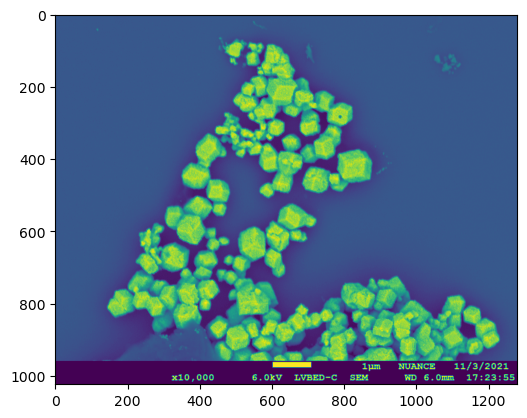

In [2]:
# Define an Image to open
working_dir = Path(os.path.abspath(""))
image_dir = working_dir.parent / "Images"
image_paths = list(image_dir.rglob("*"))
image_path_oi = str(image_paths[0])

image = cv2.imread(image_path_oi,0)
plt.imshow(image)

<p> The <b>ImageSegmenter</b> class uses a <b>AbstractSegmenter</b> class to actually perform segmentation. This separates the job of creating thresholds and marker regions from the job of measuring, labeling, and guiding the process of interacting with data </p>
<p> Below, we look at several segmenter classes to see what each one does </p>

c:\Users\Jacob\miniconda3\envs\colloidal_crystal_env\lib\site-packages\numpy\lib\arraypad.py:147: RuntimeWarning: invalid value encountered in cast
  padded[left_slice] = value_pair[0]
c:\Users\Jacob\miniconda3\envs\colloidal_crystal_env\lib\site-packages\numpy\lib\arraypad.py:151: RuntimeWarning: invalid value encountered in cast
  padded[right_slice] = value_pair[1]
c:\Users\Jacob\miniconda3\envs\colloidal_crystal_env\lib\site-packages\sklearn\base.py:299: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.0 when using version 1.2.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\Jacob\miniconda3\envs\colloidal_crystal_env\lib\site-packages\sklearn\base.py:299: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.0 when using version 1.2.1. This might

cuda:0 cuda:0 cuda:0


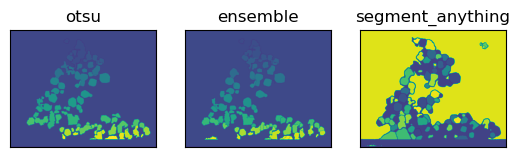

In [3]:
example_segmenters = {
    "otsu":segmenter.AlgorithmicSegmenter(
            image=image,
            threshold_mode="otsu", # From: "otsu", "local", "pixel", and "ensemble"
            edge_modification=None,
        ),
    "ensemble":segmenter.AlgorithmicSegmenter(
            image=image,
            threshold_mode="ensemble", # From: "otsu", "local", "pixel", and "ensemble"
            edge_modification="localthresh",
        ),
    "segment_anything":segmenter.SAMSegmenter(
        image,
        sam_kwargs={"points_per_side": 16, "min_mask_region_area":20} # Default: {"points_per_side": 64, "min_mask_region_area":20}
    )
}

# Show each of the results' markers
fig, axes = plt.subplots(ncols=len(example_segmenters))
for ii, (name, seg) in enumerate(example_segmenters.items()):
    ax = axes[ii]
    ax.imshow(seg.markers_filled)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(name)

<p> An <b>ImageSegmenter</b> can accept a lot of different options, including the name of the segmenter you want to use OR a segmenter class to use. This allows use of established and custom segmenters </p>
<p> An <b>ImageSegmenter</b> can accept path or image, with the former being more preferable for tracking the filename for later review </p>

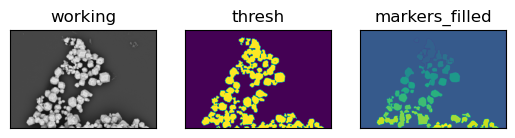

In [4]:
image_segmenter = segmenter.ImageSegmenter(image_path_oi,
                                           result_folder_path="." # For save behavior in jupyter labeling
                                           )

# Visualize each of the Image Segmenter's main images
image_dict = {
    "working":image_segmenter.image_working,
    "thresh":image_segmenter.thresh,
    "markers_filled":image_segmenter.markers_filled,
}
# Show each of the results' markers
fig, axes = plt.subplots(ncols=len(image_dict))
for ii, (name, im) in enumerate(image_dict.items()):
    ax = axes[ii]
    ax.imshow(im)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(name)

<p> The <b>ImageSegmenter</b> class will run measurements on the provided image and return these in its 'df' attribute. The "pixel_to_um" argument tries to scale pixels in the image to actual measurements. </p>

In [5]:
image_segmenter.df.head(5)

C:\Users\Jacob\Desktop\Academics\Mirkin\colloidal_crystal_ML\facet_ml\segmentation\features.py:521: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(rotated_x, rotated_y, 2)
C:\Users\Jacob\Desktop\Academics\Mirkin\colloidal_crystal_ML\facet_ml\segmentation\features.py:521: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(rotated_x, rotated_y, 2)


,area,equivalent_diameter,orientation,major_axis_length,minor_axis_length,perimeter,min_intensity,mean_intensity,max_intensity,solidity,...,Filename,Region,mean_curvature,std_curvature,min_curvature,max_curvature,percent_convexity_curvature,longest_contiguous_percent_concavity_curvature,longest_contiguous_percent_convexity_curvature,number_distinct_paths_curvature
0,1.180868e+05,387.753559,-1.189709,427.493847,364.889844,1388.206062,129.0,209.017844,242.0,0.935327,...,c:\Users\Jacob\Desktop\Academics\Mirkin\colloi...,1,0.019251,0.453776,-5.810116,0.985078,79.661017,5.649718,19.774011,12.0
1,1.326172e+06,1299.436361,-0.227981,2377.724914,952.450945,8302.515309,111.0,199.011122,255.0,0.687059,...,c:\Users\Jacob\Desktop\Academics\Mirkin\colloi...,2,0.001319,0.129558,-0.867619,0.738646,68.372093,3.441860,15.627907,116.0
2,1.666385e+05,460.619961,1.005345,557.007896,485.808898,2302.033227,117.0,191.994731,253.0,0.743439,...,c:\Users\Jacob\Desktop\Academics\Mirkin\colloi...,3,0.043940,0.178431,-1.430813,1.516956,71.280277,14.186851,30.449827,20.0
3,5.715578e+04,269.764715,-0.989865,286.125083,262.957877,976.201889,151.0,217.210445,249.0,0.886921,...,c:\Users\Jacob\Desktop\Academics\Mirkin\colloi...,4,-0.006174,0.359475,-3.535397,0.861300,57.480315,14.960630,11.811024,18.0
4,3.524168e+05,669.858904,-0.455291,1002.365681,593.220779,3348.096375,116.0,190.913802,255.0,0.755932,...,c:\Users\Jacob\Desktop\Academics\Mirkin\colloi...,5,0.021685,0.117552,-1.297419,0.348424,71.362587,6.004619,13.625866,48.0


<p> For use in Jupyter Notebooks, the <b>ImageSegmenter</b> class comes with a "begin_labeling" method for basic prompting to fill in Labels on data </p>

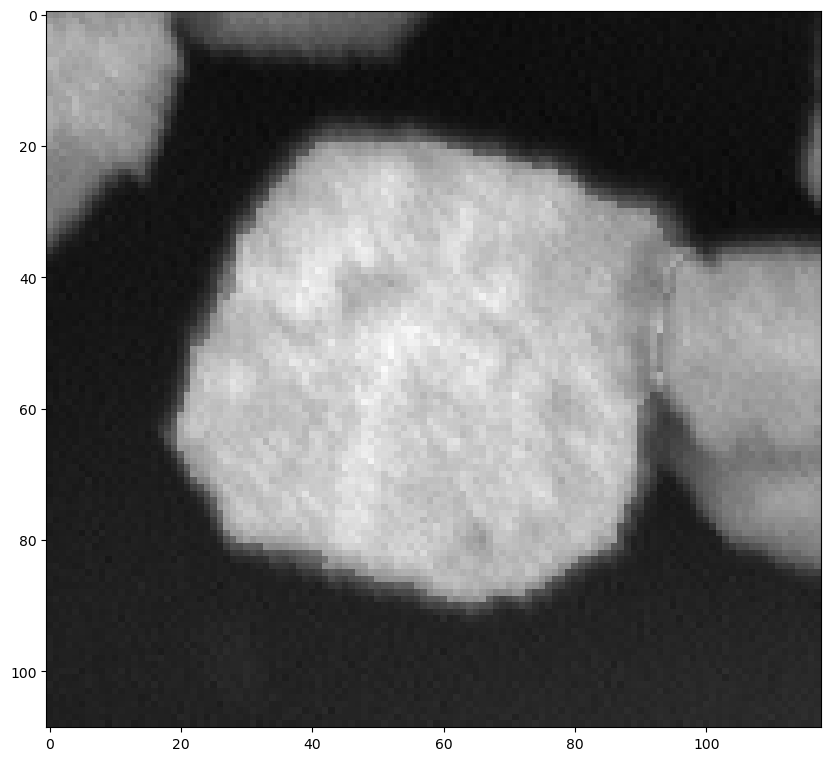

Region 1 (Max: 53) 
NOTE: Skipping a region may mean a bad region was encountered

Type an integer to jump to region, or a character below to label image
 C = Crystal, M = Multiple Crystal, P = Poorly Segmented, I = Incomplete 
B = Back, D = Done


: 

In [6]:
image_segmenter.begin_labeling()